In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/evals.csv")

In [3]:
df_fs = df.loc[df.few_shot]

In [4]:
df_fs.head()

,dataset,Model,batch_size,prompt_type,few_shot,background_knowledge,History Signal,history_k,wandb,num_gpus,...,Persona Signal,Prompt Type,Method,BLEU,rouge1,rouge2,rougeL,Bert-p,Bert-r,Bert-f1
14,MSC,flanT5-XL,12,manual,True,False,Full,4,False,1,...,None,Orig,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
15,MSC,flanT5-XL,12,manual,True,False,PegasusFT,4,False,1,...,None,Orig,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
16,MSC,flanT5-XL,12,manual,True,False,BART,4,False,1,...,None,Orig,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
17,MSC,flanT5-XL,12,manual,True,False,Recent-2,2,False,1,...,None,Orig,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
18,MSC,flanT5-XL,12,manual,True,False,Recent-4,4,False,1,...,None,Orig,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [5]:
df_fs['HK'] = ""
df_fs.loc[df_fs['background_knowledge'], 'HK'] = "+BI"
df_fs['HK'] = df_fs['History Signal'] + df_fs['HK']


df_fs['DP'] = ""
df_fs.loc[df_fs['prompt_type']=='ppl', 'DP'] = " (ppl)"
df_fs['DP'] = df_fs['dataset'] + df_fs['DP']

<ipython-input-5-88cc06bb6d26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fs['HK'] = ""
/home/bytestorm/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
<ipython-input-5-88cc06bb6d26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [6]:
df_fs['HK'].unique()

array(['Full', 'PegasusFT', 'BART', 'Recent-2', 'Recent-4', 'Recent-8',
       'Recent-10', 'Semantic-2', 'Semantic-4', 'Semantic-8',
       'Semantic-10', 'None', 'PegasusFT+BI', 'BART+BI', 'Pegasus-CD',
       'Recent-1', 'Semantic-1'], dtype=object)

In [35]:
df_fs_lengths = df_fs.groupby(['DP', 'HK']).mean()[['prompt']]

# Reorganize df: Each DP value to columns 
df_fs_lengths = df_fs_lengths.reset_index().pivot(index='HK', columns='DP', values='prompt')

# Sort all rows by 'MSC' column
df_fs_lengths = df_fs_lengths.sort_values(by='MSC', ascending=True)

In [36]:
df_fs_lengths

DP,MSC,MSC (ppl),TC,TC (ppl)
HK,,,,
None,158.542563,167.639816,135.742874,146.891368
Recent-1,296.428589,285.967485,274.391903,266.023398
Semantic-1,314.130491,304.619039,277.286834,269.646639
PegasusFT,356.025215,341.779696,271.986549,259.403468
BART,358.194601,343.964479,270.801265,258.216091
Semantic-2,368.217362,358.748732,327.654285,320.213225
Recent-2,374.121350,362.700859,322.257394,313.884524
Pegasus-CD,387.575092,371.592699,339.131124,325.866100
Semantic-4,462.433313,451.531534,415.804605,407.130961


100 1000


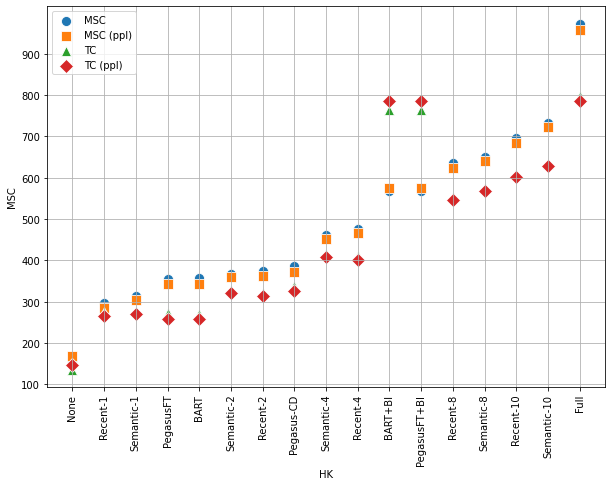

In [54]:
# plot df_fs_lengths using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# X-asix: (HK) index
# Each column as a scatter plot with proper legend
ax = plt.figure(figsize=(10,7))


markers = ["o", "s", "^", "D", "v"]  # list of unique markers
for idx, c in enumerate(df_fs_lengths):
    sns.scatterplot(data=df_fs_lengths, x=df_fs_lengths.index, y=c, label=c, s=100, marker=markers[idx % len(markers)])


# for c in df_fs_lengths:
#     sns.scatterplot(df_fs_lengths, x=df_fs_lengths.index, y=c, label=c, s=100)


plt.legend()
plt.xticks(rotation=90)
min_y = df_fs_lengths.min().min()
min_y = int(100*(min_y//100))
max_y = df_fs_lengths.max().max()
max_y = int(100*(max_y//100 + 1))
print(min_y, max_y)
plt.yticks(ticks=range(min_y, max_y, 100))

plt.grid()
# sns

In [32]:
# extract order of HK values based on average 'prompt'
# X = df_fs_lengths.groupby('HK').mean().sort_values('prompt').index.tolist()
# X_c = df_fs_lengths.groupby('HK').count()

# to_remove = ['BART+BI']

# for r in to_remove:
#     if r in X:
#         X.remove(r)
